In [1]:
import warnings
warnings.simplefilter('ignore')

# Análise de Séries Temporais com Python
---

## 8ª Conferência SciPy América Latina 2021

### Wilson Freitas

# Wilson Freitas

- físico
- trabalha no mercado financeiro com modelagem quantitativa
- corredor
- padeiro

# Agenda

- O que são Séries Temporais?
- Exemplos
- Séries Temporais no pandas
    - Datas no pandas
    - Leitura e manipulação de Séries Temporais
    - Resampling
    - Janelas Móveis
- Séries Temporais + Python

# O que são Séries Temporais?

## Qualquer conjunto de dados ordenados no tempo

<!-- <br>
<br>
<br>
<br>
<br>
<div style="font-size: 150%; text-align: center; margin-top: 15px; margin-bottom: 15px;">
</div>
 -->
<!-- - Objetivo
    - Estudar a dinâmica das grandezas

- Área abrangente que envolve:
    - processos estocásticos lineares estacionários
    - processos não lineares
    - processos com heterocedasticidade condicional — Modelos de Volatilidade
    - processos multivariados

- Exemplos:
    - preços de ações na Bolsa de Valores
    - dados de tráfego do estado de São Paulo
    - registro de temperatura
    - Dados de GPS: posição, frequência cardíaca
     -->

<!-- ## >>> Trazer exemplos com gráficos -->


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 6.0)
import statsmodels.api as sm
import statsmodels.tsa as tsa
from bcb import sgs, currency
import yfinance as yf
import datetime

# Séries Temporais

- Diversas grandesas, que podem ser salvas ao longo do tempo, através de sensores ou obtidos diretamente da Internet.
    - Dados de relógios (temperatura, frequência cardiaca, ...)
    - Dados de clima
    - Dados de negociação de ativos financeiros (preços, negócios, volume)
    - Logs de rede/Acessos

- Séries Temporais é uma disciplina altamente empírica.

- Usa muito a **Inferência Estatística**.

# Exemplos

# Inflação

- Séries Temporais de Inflação (IPCA - IBGE)
- Dados mensais

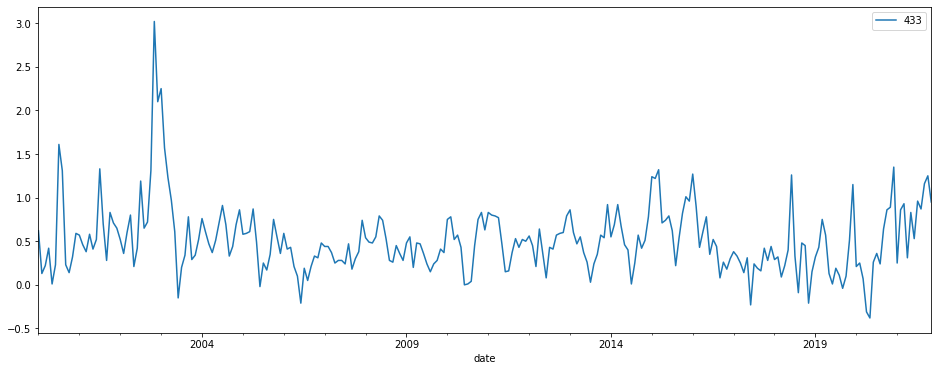

In [3]:
df = sgs.get(433, start_date='2000-01-01')
df.plot();

# Vendas no Varejo

- Dados mensais de vendas no varejo.

- Dados de vendas costumam apresentar sazonalidade.

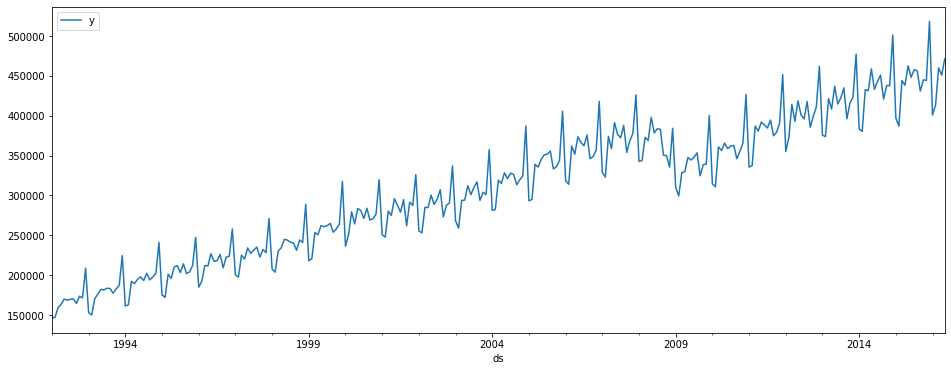

In [4]:
df = pd.read_csv('data/example_retail_sales.csv')
df['ds'] = pd.to_datetime(df['ds'])
df.plot(x='ds', y='y');

# Ibovespa

- O Ibovespa é o índice de ações mais importante do Brasil, com cotações diárias desde 1986.

- Resultado de uma carteira teórica de ações negociadas na B3.

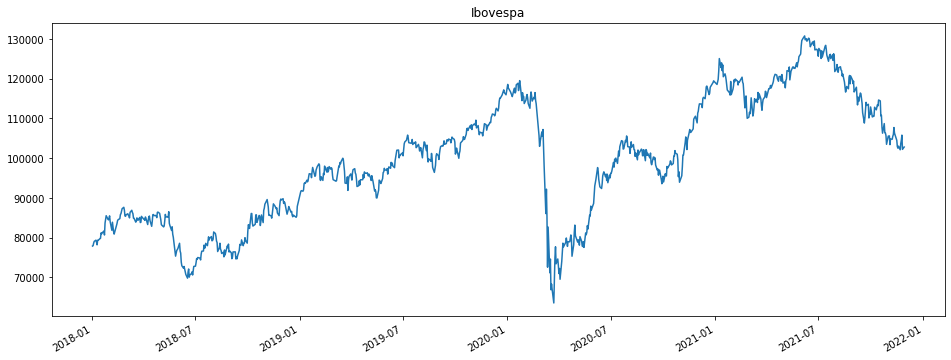

In [5]:
df = yf.download('^BVSP', start='2018-01-01', end='2021-11-30', progress=False)
df['Adj Close'].plot(title='Ibovespa', xlabel='');

# Moedas no Mundo

- Séries Temporais Multivariadas de moedas

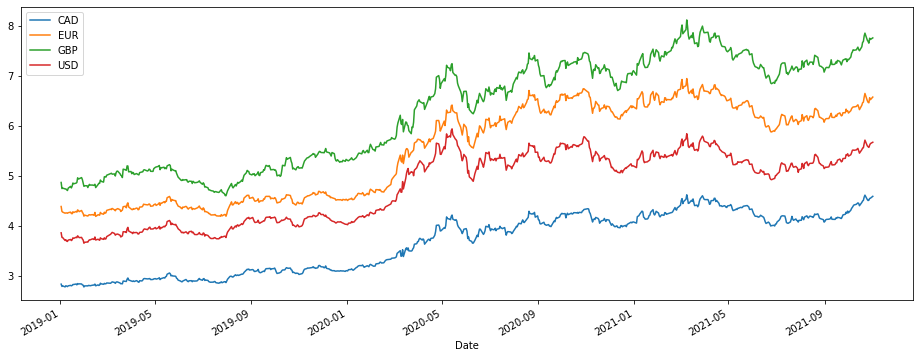

In [6]:
df = currency.get(['USD', 'GBP', 'EUR', 'CAD'], start_date='2019-01-01', end_date='2021-11-01')
df.plot();

# Logs do Wikipedia

- Séries Temporais do log diário de page views da página da Peyton Manning (american football quarterback)

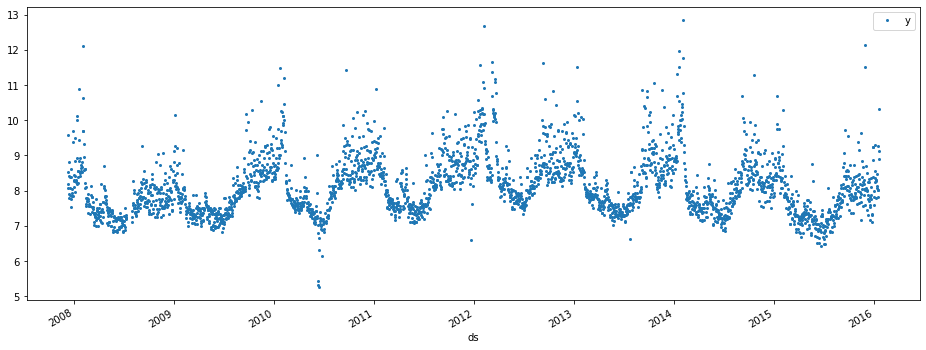

In [7]:
df = pd.read_csv('data/example_wp_log_peyton_manning.csv')
df['ds'] = pd.to_datetime(df['ds'])
df.plot(x='ds', y='y', style='o', ms=2);

# Yosemite National Park Temperatures

- Dados intradiários

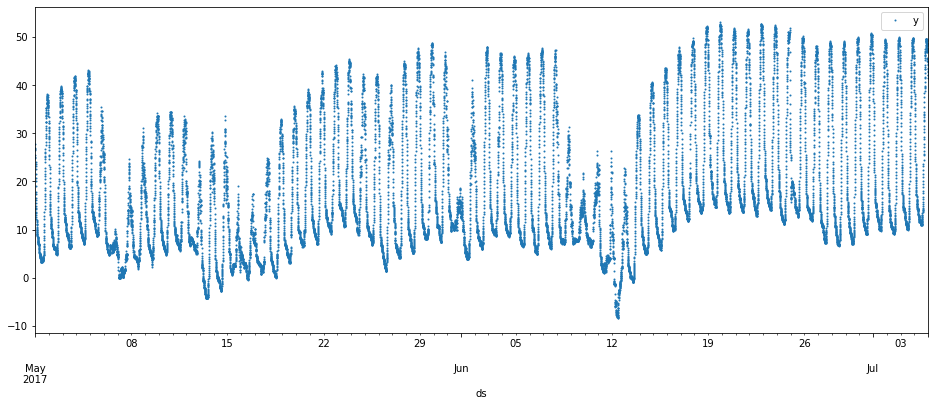

In [8]:
df = pd.read_csv('data/example_yosemite_temps.csv')
df['ds'] = pd.to_datetime(df['ds'])
df.plot(x='ds', y='y', style='o', ms=1);

# Negócios da VALE3

- Dados intradiários não regulares

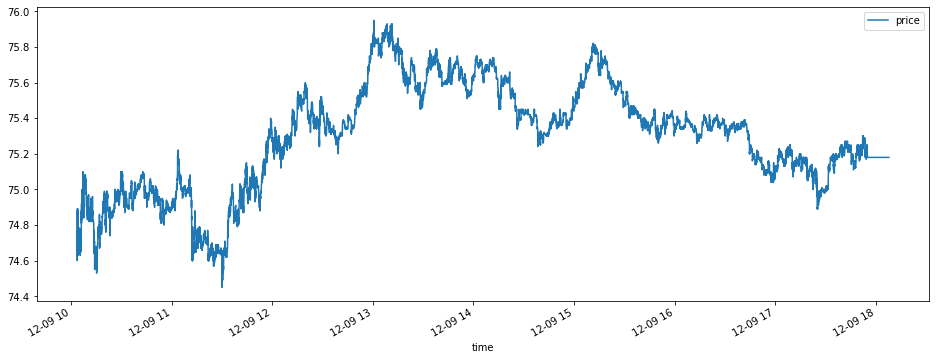

In [9]:
df = pd.read_parquet('data/VALE3_trade_intraday_20211209.parquet')
df.plot(x='time', y='price');

### But be careful
- http://twentytwowords.com/funny-graphs-show-correlation-between-completely-unrelated-stats-9-pictures/
- https://www.fastcompany.com/3030529/hilarious-graphs-prove-that-correlation-isnt-causation

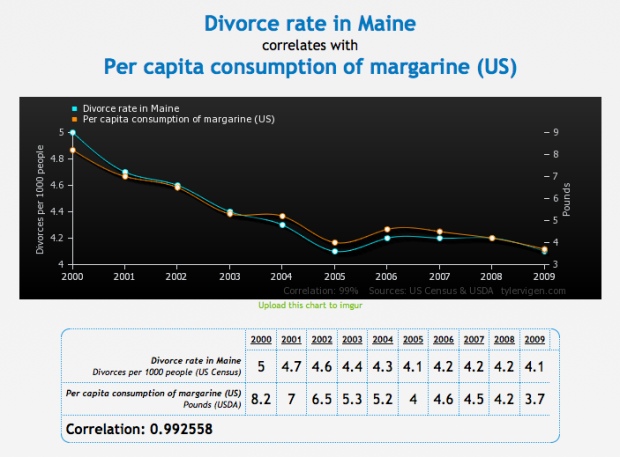


- https://flowingdata.com/2014/05/12/random-things-that-correlate/

# Como trabalhar com Séries Temporais?

![image.png](images/pandas-logo.png)

# pandas

- Séries Temporais são DataFrames do pandas.

In [10]:
df = currency.get(['USD', 'GBP', 'EUR', 'CAD'], start_date='2021-11-01', end_date='2021-11-10')
df

,CAD,EUR,GBP,USD
Date,,,,
2021-11-01,4.5884,6.5725,7.7552,5.6694
2021-11-03,4.5637,6.5655,7.7420,5.6672
2021-11-04,4.4901,6.4596,7.5483,5.5942
2021-11-05,4.4574,6.4078,7.4814,5.5455
2021-11-08,4.4698,6.4477,7.5447,5.5627
2021-11-09,4.4124,6.3673,7.4478,5.4957
2021-11-10,4.3897,6.2888,7.3560,5.4590


- O *tempo* é o índice do DataFrame.

- O índice pode ser transformado em uma coluna.

In [11]:
df.reset_index()

,Date,CAD,EUR,GBP,USD
0,2021-11-01,4.5884,6.5725,7.7552,5.6694
1,2021-11-03,4.5637,6.5655,7.7420,5.6672
2,2021-11-04,4.4901,6.4596,7.5483,5.5942
3,2021-11-05,4.4574,6.4078,7.4814,5.5455
4,2021-11-08,4.4698,6.4477,7.5447,5.5627
5,2021-11-09,4.4124,6.3673,7.4478,5.4957
6,2021-11-10,4.3897,6.2888,7.3560,5.4590


# Trabalhando com datas

Tipos de data do pandas.

1. **Date times**: Tipo data-hora semelhante a `datetime.datetime` da standard library.
2. **Time deltas**: Tipo de duração semelhante a `datetime.timedelta` da standard library.
3. **Time spans**: Intervalo de tempos como meses e trimestres, por exemplo.
4. **Date offsets**: Intervalos de tempo semelhantes a `dateutil.relativedelta.relativedelta` do pacote `dateutil`.



<table class="table">
<colgroup>
<col style="width: 15%">
<col style="width: 12%">
<col style="width: 13%">
<col style="width: 31%">
<col style="width: 28%">
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>Concept</p></th>
<th class="head"><p>Scalar Class</p></th>
<th class="head"><p>Array Class</p></th>
<th class="head"><p>pandas Data Type</p></th>
<th class="head"><p>Primary Creation Method</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>Date times</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">Timestamp</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">DatetimeIndex</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">datetime64[ns]</span></code> or <code class="docutils literal notranslate"><span class="pre">datetime64[ns,</span> <span class="pre">tz]</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">to_datetime</span></code> or <code class="docutils literal notranslate"><span class="pre">date_range</span></code></p></td>
</tr>
<tr class="row-odd"><td><p>Time deltas</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">Timedelta</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">TimedeltaIndex</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">timedelta64[ns]</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">to_timedelta</span></code> or <code class="docutils literal notranslate"><span class="pre">timedelta_range</span></code></p></td>
</tr>
<tr class="row-even"><td><p>Time spans</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">Period</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">PeriodIndex</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">period[freq]</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">Period</span></code> or <code class="docutils literal notranslate"><span class="pre">period_range</span></code></p></td>
</tr>
<tr class="row-odd"><td><p>Date offsets</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">DateOffset</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">None</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">None</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">DateOffset</span></code></p></td>
</tr>
</tbody>
</table>

- [Time series / date functionality - pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)

# Timestamp

- `Timestamp` is a scalar type that represents a single time stamp.

In [12]:
pd.to_datetime('2021-11-21') # ISO format always works

Timestamp('2021-11-21 00:00:00')

In [13]:
pd.to_datetime('11/12/2021')

Timestamp('2021-11-12 00:00:00')

In [14]:
pd.to_datetime('12/11/2021', dayfirst=True)

Timestamp('2021-11-12 00:00:00')

In [15]:
pd.to_datetime('12/14/2021', dayfirst=True) # dayfirst isn't strict

Timestamp('2021-12-14 00:00:00')

In [16]:
pd.to_datetime('December 11, 2021') # it also parses long dates

Timestamp('2021-12-11 00:00:00')

# Timestamp

In [17]:
pd.to_datetime('2021-11-21 13:00:00') # ISO format always works

Timestamp('2021-11-21 13:00:00')

In [18]:
pd.to_datetime('11/12/2021 13:00')

Timestamp('2021-11-12 13:00:00')

In [19]:
pd.to_datetime('12/11/2021 13', dayfirst=True)

Timestamp('2021-11-12 13:00:00')

In [20]:
pd.to_datetime(datetime.datetime(2021, 12, 14, 13)) # also accepts datetime.datetime

Timestamp('2021-12-14 13:00:00')

# Timestamp NULL type

- `pd.NaT` represents null date times, time deltas, and time spans.

- Useful for representing missing or null date like values.

In [21]:
pd.Timestamp(None)

NaT

In [22]:
pd.to_datetime(pd.NaT)

NaT

In [23]:
pd.to_datetime(pd.NaT) == pd.NaT

False

# Timestamp as array

In [24]:
pd.to_datetime(['2021 Dec 14', '14/12/2021', '12/14/2021', 'December 14, 2021',
                '2021-12-14', '2021/12/14', None], dayfirst=True)

DatetimeIndex(['2021-12-14', '2021-12-14', '2021-12-14', '2021-12-14',
               '2021-12-14', '2021-12-14',        'NaT'],
              dtype='datetime64[ns]', freq=None)

In [25]:
pd.to_datetime(pd.Series(['2021 Dec 14', '14/12/2021', '12/14/2021', 'December 14, 2021',
                '2021-12-14', '2021/12/14', None]), dayfirst=True)

0   2021-12-14
1   2021-12-14
2   2021-12-14
3   2021-12-14
4   2021-12-14
5   2021-12-14
6          NaT
dtype: datetime64[ns]

# Generating ranges of time stamps

- `date_range` generates DatetimeIndex

In [26]:
pd.date_range('2021-12-01', '2021-12-11')

DatetimeIndex(['2021-12-01', '2021-12-02', '2021-12-03', '2021-12-04',
               '2021-12-05', '2021-12-06', '2021-12-07', '2021-12-08',
               '2021-12-09', '2021-12-10', '2021-12-11'],
              dtype='datetime64[ns]', freq='D')

In [27]:
pd.date_range('2021-12-01', periods=5) # daily ranges

DatetimeIndex(['2021-12-01', '2021-12-02', '2021-12-03', '2021-12-04',
               '2021-12-05'],
              dtype='datetime64[ns]', freq='D')

In [28]:
pd.date_range('2021-12-01', periods=5, freq='M') # monthly ranges

DatetimeIndex(['2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30'],
              dtype='datetime64[ns]', freq='M')

# Generating ranges of time stamps



In [29]:
pd.date_range('2021-12-01', '2021-12-11', freq='B') # only business days

DatetimeIndex(['2021-12-01', '2021-12-02', '2021-12-03', '2021-12-06',
               '2021-12-07', '2021-12-08', '2021-12-09', '2021-12-10'],
              dtype='datetime64[ns]', freq='B')

In [30]:
pd.date_range('2021-12-01', periods=5, freq='BM') # business days for month end frequency

DatetimeIndex(['2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-29'],
              dtype='datetime64[ns]', freq='BM')

In [31]:
pd.date_range('2021-12-01', periods=5, freq='BMS') # business days for monthly start frequency

DatetimeIndex(['2021-12-01', '2022-01-03', '2022-02-01', '2022-03-01',
               '2022-04-01'],
              dtype='datetime64[ns]', freq='BMS')

# Supported frequencies (`freq` argument)

<table class="colwidths-given table">
<colgroup>
<col style="width: 13%">
<col style="width: 87%">
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>Alias</p></th>
<th class="head"><p>Description</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>B</p></td>
<td><p>business day frequency</p></td>
</tr>
<tr class="row-odd"><td><p>C</p></td>
<td><p>custom business day frequency</p></td>
</tr>
<tr class="row-even"><td><p>D</p></td>
<td><p>calendar day frequency</p></td>
</tr>
<tr class="row-odd"><td><p>W</p></td>
<td><p>weekly frequency</p></td>
</tr>
<tr class="row-even"><td><p>M</p></td>
<td><p>month end frequency</p></td>
</tr>
<tr class="row-odd"><td><p>SM</p></td>
<td><p>semi-month end frequency (15th and end of month)</p></td>
</tr>
<tr class="row-even"><td><p>BM</p></td>
<td><p>business month end frequency</p></td>
</tr>
<tr class="row-odd"><td><p>CBM</p></td>
<td><p>custom business month end frequency</p></td>
</tr>
<tr class="row-even"><td><p>MS</p></td>
<td><p>month start frequency</p></td>
</tr>
<tr class="row-odd"><td><p>SMS</p></td>
<td><p>semi-month start frequency (1st and 15th)</p></td>
</tr>
<tr class="row-even"><td><p>BMS</p></td>
<td><p>business month start frequency</p></td>
</tr>
<tr class="row-odd"><td><p>CBMS</p></td>
<td><p>custom business month start frequency</p></td>
</tr>
<tr class="row-even"><td><p>Q</p></td>
<td><p>quarter end frequency</p></td>
</tr>
<tr class="row-odd"><td><p>BQ</p></td>
<td><p>business quarter end frequency</p></td>
</tr>
<tr class="row-even"><td><p>QS</p></td>
<td><p>quarter start frequency</p></td>
</tr>
<tr class="row-odd"><td><p>BQS</p></td>
<td><p>business quarter start frequency</p></td>
</tr>
<tr class="row-even"><td><p>A, Y</p></td>
<td><p>year end frequency</p></td>
</tr>
<tr class="row-odd"><td><p>BA, BY</p></td>
<td><p>business year end frequency</p></td>
</tr>
<tr class="row-even"><td><p>AS, YS</p></td>
<td><p>year start frequency</p></td>
</tr>
<tr class="row-odd"><td><p>BAS, BYS</p></td>
<td><p>business year start frequency</p></td>
</tr>
<tr class="row-even"><td><p>BH</p></td>
<td><p>business hour frequency</p></td>
</tr>
<tr class="row-odd"><td><p>H</p></td>
<td><p>hourly frequency</p></td>
</tr>
<tr class="row-even"><td><p>T, min</p></td>
<td><p>minutely frequency</p></td>
</tr>
<tr class="row-odd"><td><p>S</p></td>
<td><p>secondly frequency</p></td>
</tr>
<tr class="row-even"><td><p>L, ms</p></td>
<td><p>milliseconds</p></td>
</tr>
<tr class="row-odd"><td><p>U, us</p></td>
<td><p>microseconds</p></td>
</tr>
<tr class="row-even"><td><p>N</p></td>
<td><p>nanoseconds</p></td>
</tr>
</tbody>
</table>

# Period (time spans)

- The span represented by Period can be specified explicitly, or inferred from datetime string format.

In [32]:
pd.Period('2021-11')

Period('2021-11', 'M')

In [33]:
pd.Period(2021)

Period('2021', 'A-DEC')

In [34]:
pd.Period(2021, freq='D')

Period('2021-01-01', 'D')

In [35]:
pd.period_range('2021', freq='Y', periods=6)

PeriodIndex(['2021', '2022', '2023', '2024', '2025', '2026'], dtype='period[A-DEC]')

In [36]:
pd.period_range('2021', freq='M', periods=6)

PeriodIndex(['2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06'], dtype='period[M]')

# Timezone

In [37]:
pd.date_range('2021-12-01 18', periods=12, freq='1H')

DatetimeIndex(['2021-12-01 18:00:00', '2021-12-01 19:00:00',
               '2021-12-01 20:00:00', '2021-12-01 21:00:00',
               '2021-12-01 22:00:00', '2021-12-01 23:00:00',
               '2021-12-02 00:00:00', '2021-12-02 01:00:00',
               '2021-12-02 02:00:00', '2021-12-02 03:00:00',
               '2021-12-02 04:00:00', '2021-12-02 05:00:00'],
              dtype='datetime64[ns]', freq='H')

In [38]:
pd.date_range('2021-12-01 18', periods=12, freq='1H', tz='UTC')

DatetimeIndex(['2021-12-01 18:00:00+00:00', '2021-12-01 19:00:00+00:00',
               '2021-12-01 20:00:00+00:00', '2021-12-01 21:00:00+00:00',
               '2021-12-01 22:00:00+00:00', '2021-12-01 23:00:00+00:00',
               '2021-12-02 00:00:00+00:00', '2021-12-02 01:00:00+00:00',
               '2021-12-02 02:00:00+00:00', '2021-12-02 03:00:00+00:00',
               '2021-12-02 04:00:00+00:00', '2021-12-02 05:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='H')

In [39]:
pd.date_range('2021-12-01 18', periods=12, freq='1H', tz='UTC').tz_convert('America/Sao_Paulo')

DatetimeIndex(['2021-12-01 15:00:00-03:00', '2021-12-01 16:00:00-03:00',
               '2021-12-01 17:00:00-03:00', '2021-12-01 18:00:00-03:00',
               '2021-12-01 19:00:00-03:00', '2021-12-01 20:00:00-03:00',
               '2021-12-01 21:00:00-03:00', '2021-12-01 22:00:00-03:00',
               '2021-12-01 23:00:00-03:00', '2021-12-02 00:00:00-03:00',
               '2021-12-02 01:00:00-03:00', '2021-12-02 02:00:00-03:00'],
              dtype='datetime64[ns, America/Sao_Paulo]', freq='H')

# Carregando dados

- Carregar os dados

In [40]:
df = pd.read_csv('data/example_retail_sales.csv')
df.dtypes

ds    object
y      int64
dtype: object

- Formatar os dados

In [41]:
df['ds'] = pd.to_datetime(df['ds'])
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

- Definir o índice

In [42]:
df = df.set_index('ds')
df.head()

,y
ds,
1992-01-01,146376
1992-02-01,147079
1992-03-01,159336
1992-04-01,163669
1992-05-01,170068


# Carregando dados com Time spans

- Carregar os dados

In [43]:
df = pd.read_csv('data/champagne_sales.csv')
df.dtypes

Month    object
Sales     int64
dtype: object

- Formatar os dados

In [44]:
df['Month'] = pd.PeriodIndex(df['Month'], freq='M')
df['Month'].head()

0    1964-01
1    1964-02
2    1964-03
3    1964-04
4    1964-05
Name: Month, dtype: period[M]

- Definir o índice

In [45]:
dfi = df.set_index('Month')
dfi.head()

,Sales
Month,
1964-01,2815
1964-02,2672
1964-03,2755
1964-04,2721
1964-05,2946


# Trabalhando com timezones

In [46]:
df = pd.read_csv('data/example_yosemite_temps.csv')
df.head()

,ds,y
0,2017-05-01 00:00:00,27.8
1,2017-05-01 00:05:00,27.0
2,2017-05-01 00:10:00,26.8
3,2017-05-01 00:15:00,26.5
4,2017-05-01 00:20:00,25.6


In [47]:
df['ds'] = pd.DatetimeIndex(df['ds'], tz='US/Alaska')
df.head()

,ds,y
0,2017-05-01 00:00:00-08:00,27.8
1,2017-05-01 00:05:00-08:00,27.0
2,2017-05-01 00:10:00-08:00,26.8
3,2017-05-01 00:15:00-08:00,26.5
4,2017-05-01 00:20:00-08:00,25.6


In [48]:
df.set_index('ds').head()

,y
ds,
2017-05-01 00:00:00-08:00,27.8
2017-05-01 00:05:00-08:00,27.0
2017-05-01 00:10:00-08:00,26.8
2017-05-01 00:15:00-08:00,26.5
2017-05-01 00:20:00-08:00,25.6


# Resampling

- Converter as Séries Temporais em diferentes frequências.

<!-- - 
Returns the original data conformed to a new index with the specified frequency.

If the index of this DataFrame is a PeriodIndex, the new index is the result of transforming the original index with PeriodIndex.asfreq (so the original index will map one-to-one to the new index).

Otherwise, the new index will be equivalent to pd.date_range(start, end, freq=freq) where start and end are, respectively, the first and last entries in the original index (see pandas.date_range()). The values corresponding to any timesteps in the new index which were not present in the original index will be null (NaN), unless a method for filling such unknowns is provided (see the method parameter below).
 -->

In [49]:
df = pd.read_csv('data/example_wp_log_peyton_manning.csv')
df['ds'] = pd.to_datetime(df['ds'])
dfi = df.set_index('ds')
dfi.shape

(2905, 1)

- O método `asfreq` retorna um DataFrame com os dados na frequência especificada.

In [50]:
dfw = dfi.asfreq('1W')
dfw.shape

(423, 1)

In [51]:
dfw.head()

,y
ds,
2007-12-16,8.414052
2007-12-23,8.385261
2007-12-30,9.703145
2008-01-06,9.509259
2008-01-13,9.996522


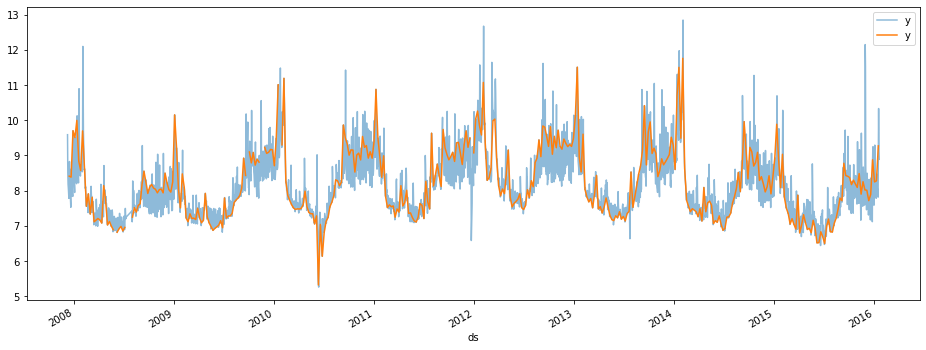

In [52]:
ax = dfi.plot(alpha=0.5)
dfw.plot(ax=ax);

# Resampling with `resample`

In [53]:
df = pd.read_csv('data/champagne_sales.csv')
df['Month'] = pd.PeriodIndex(df['Month'], freq='M')
dfi = df.set_index('Month')

- O método `resample` reagrupa os dados na frequência especificada.

In [54]:
dfm = dfi.resample('Y').mean()
dfm

,Sales
Month,
1964,3478.166667
1965,3864.166667
1966,4337.666667
1967,5016.000000
1968,5370.583333
1969,5713.416667
1970,5006.583333
1971,5640.583333
1972,4310.555556


In [55]:
dfs = dfi.resample('Y').std()
dfm.merge(dfs, left_index=True, right_index=True, suffixes=('_mean', '_std'))

,Sales_mean,Sales_std
Month,,
1964,3478.166667,1555.294759
1965,3864.166667,1900.883758
1966,4337.666667,2119.889119
1967,5016.000000,2380.616001
1968,5370.583333,2723.367082
1969,5713.416667,3382.162795
1970,5006.583333,3324.223996
1971,5640.583333,2995.572747
1972,4310.555556,1265.150200


# Análise em Janelas Móveis

- Fazer a avaliação de uma estatística em datasets de tamanho específico avançando no tempo.

In [56]:
df = pd.read_csv('data/example_wp_log_peyton_manning.csv')
df['ds'] = pd.to_datetime(df['ds'])
dfi = df.set_index('ds')

- O método `rolling` faz o agrupamento das séries na janela especificada.

In [57]:
rw = dfi.rolling(window=30)

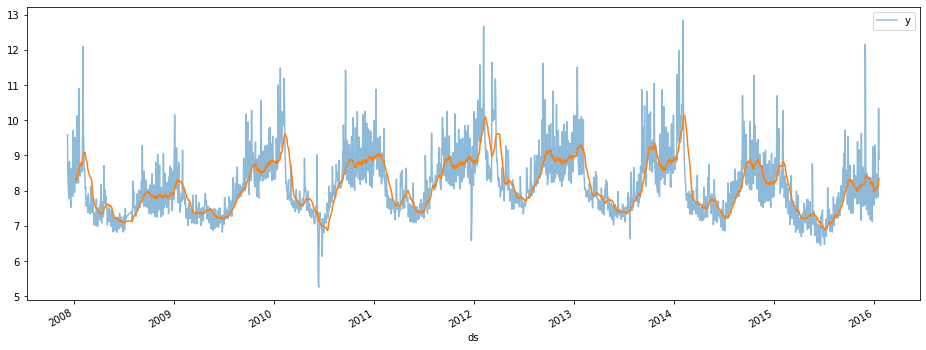

In [58]:
dfi.plot(alpha=0.5)
rw.mean()['y'].plot();

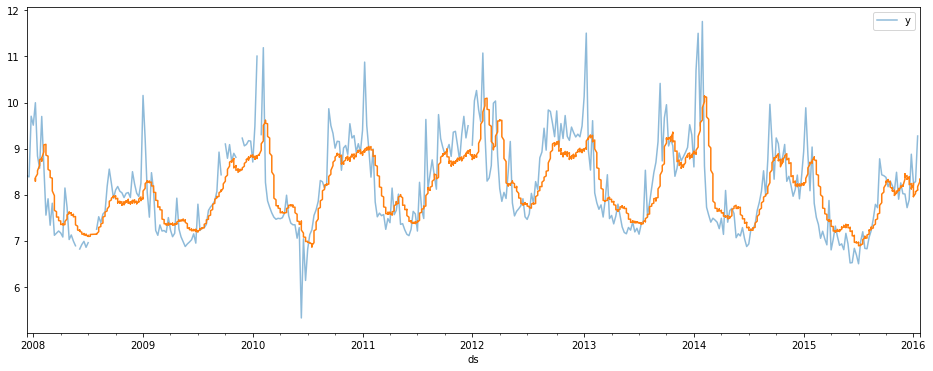

In [59]:
dfi.asfreq('W').plot(alpha=0.5)
rw.mean()['y'].plot();

# Médias Móveis em Análise Técnica

- As médias móveis dos preços de ações são utilizados em Análise Técnica de Investimentos na identificação de oportunidades de compra e venda.

In [60]:
df = yf.download('^BVSP', start='2020-07-01', end='2021-11-30', progress=False)
close = df['Adj Close']

- Calculamos as médias móveis
    - 5 dias úteis (aprox. 1 semana)
    - 21 dias úteis (apox. 1 mês)

In [61]:
mm5 = close.rolling(window=5).mean()
mm21 = close.rolling(window=21).mean()

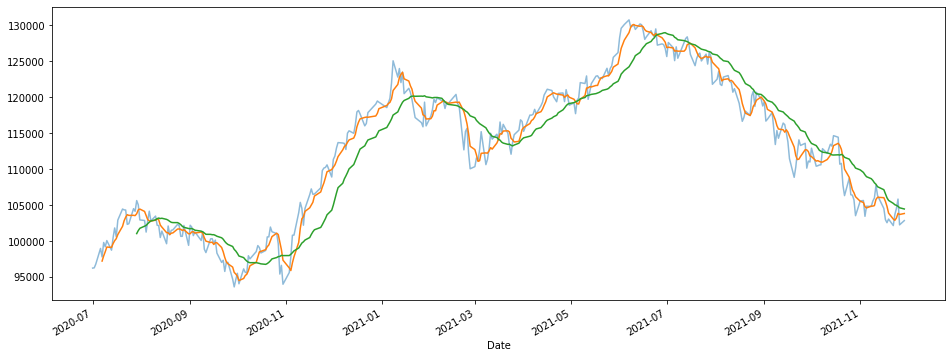

In [62]:
close.plot(alpha=0.5)
mm5.plot()
mm21.plot();

# Estratégia

- Média móvel curta indica tendência de curto prazo.
- Média móvel longa indica tendência de longo prazo.
- Quando a média móvel curva cruza a longa, *acredita-se* que há uma inversão de tendência.
    - Essa inversão de tendência indica oportunidade de compra ou venda.

# Identificando outliers

- Algumas séries de ações apresentam variações diárias muito discrepantes.

- Isso em geral está relacionado a algum evento externo e não diretamente a negociação.

- Dessa maneira, é necessário mapear estes eventos para avaliar o tratamento dados aos ativos.

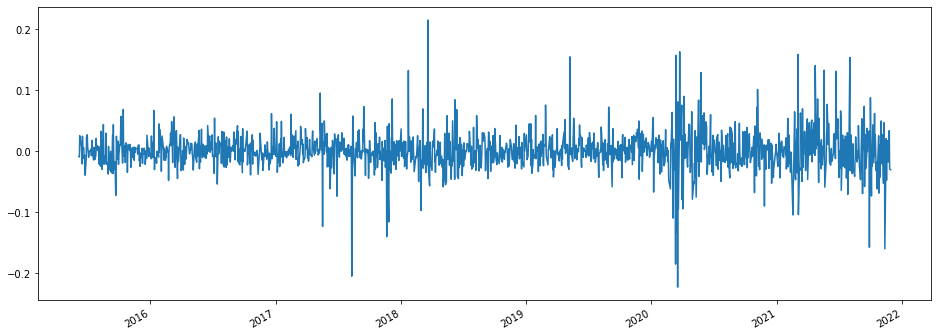

In [63]:
series = yf.download('WIZS3.SA', start='2015-01-01', end='2021-11-30', progress=False)
close = series['Adj Close']
ret = close.pct_change()
ret.plot(xlabel='');

- Note que temos variações diárias em torno de 20% para algumas datas.

- Utilizamos a distribuição t-Studend para as variações diárias.

- Estimamos os parâmetros da distribuição em uma janela móvel de 756 dias úteis (aprox. 3 anos).

- Avaliamos a evolução das estimativas dos graus de liberdade da distribuição.

In [64]:
from scipy.stats import t

In [65]:
rw = ret.rolling(window=756)
ret_tdf = rw.apply(lambda x: t.fit(x.values)[0]).dropna()
ret_std = np.sqrt(252) * rw.std().dropna()

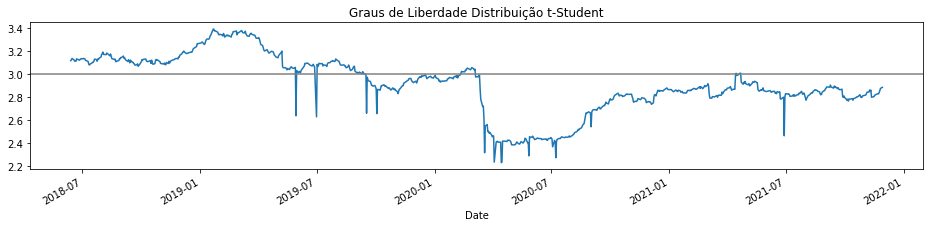

In [66]:
ax = ret_tdf.plot(figsize=(16, 3))
ax.set_title('Graus de Liberdade Distribuição t-Student');
plt.axhline(3, color='grey');

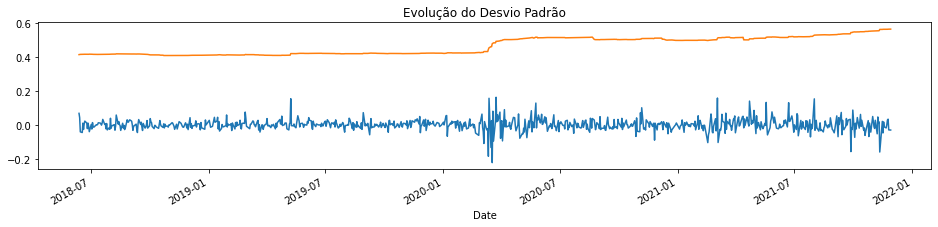

In [67]:
ax = ret.loc[ret_std.index].plot(figsize=(16, 3));
ret_std.plot()
ax.set_title('Evolução do Desvio Padrão');

- Tipicamente o parâmetro de graus de liberdade não apresenta valores menores que 3, logo, quando isso acontece, requer uma avaliação.

# Expanding

In [68]:
df = pd.DataFrame(np.random.randn(720, 3), index = pd.date_range('2020-01-01', freq='D', periods=720), columns = ['A', 'B', 'C'])
df.head()

,A,B,C
2020-01-01,0.507260,0.153400,0.740776
2020-01-02,1.561907,-0.425988,-0.384353
2020-01-03,-0.182635,-0.194183,0.001665
2020-01-04,-1.496999,-0.339162,-1.245577
2020-01-05,0.844145,1.199552,-0.099892


<AxesSubplot:>

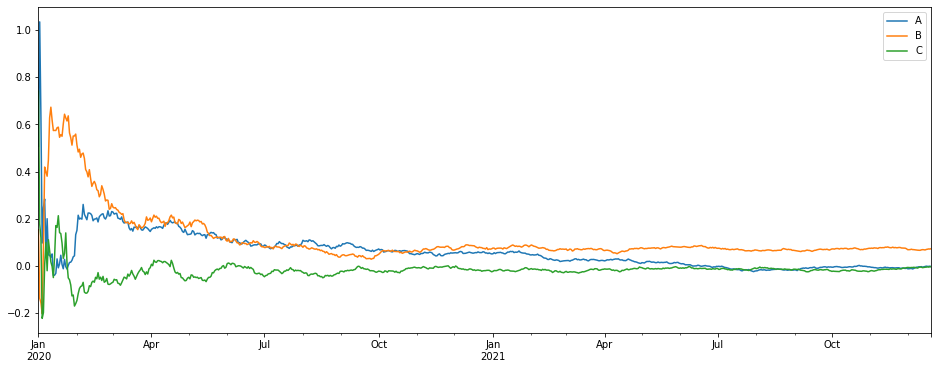

In [69]:
df.expanding(min_periods = 1).mean().plot()

# Séries Temporais + Python

# `statsmodels`

https://www.statsmodels.org/

- Um pacote que implementa diversos modelos de estimação, testes estatísticos e funções para exploração de dados.

- É um pacote com um forte viés para quem pratica Econometria.
    - Implementa diversos modelos de regressão multivariada.
    
- É bastante influenciado pelo R.

<!-- - Linear regression models
- Generalized linear models
- Discrete choice models
- Robust linear models
- Many models and functions for time series analysis
- Nonparametric estimators
- A collection of datasets for examples
- A wide range of statistical tests
- Input-output tools for producing tables in a number of formats (Text, LaTex, HTML) and for reading Stata files into NumPy and Pandas.
- Plotting functions
- Extensive unit tests to ensure correctness of results -->

# Exemplo: Regressão Linear por Mínimos Quadrados Ordinários

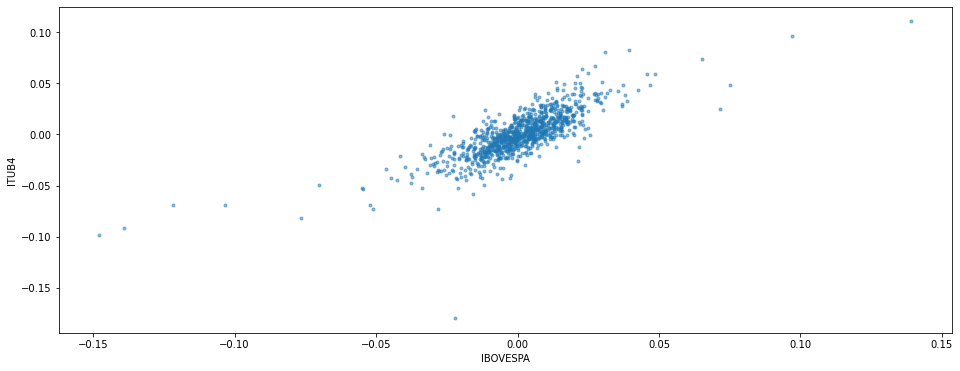

In [70]:
series = yf.download(['ITUB4.SA', '^BVSP'], start='2018-01-01', end='2021-11-30', progress=False)
close = series['Adj Close'].rename(columns={'^BVSP': 'IBOVESPA', 'ITUB4.SA': 'ITUB4'})
ret = close.pct_change().dropna()
ret.plot(x='IBOVESPA', y='ITUB4', style='o', xlabel='IBOVESPA', ylabel='ITUB4', legend=None, alpha=0.5, ms=3);

In [71]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [72]:
model = smf.ols('ITUB4 ~ IBOVESPA', data=ret)
results = model.fit()

In [73]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  ITUB4   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     1596.
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          1.22e-206
Time:                        09:03:31   Log-Likelihood:                 2765.1
No. Observations:                 966   AIC:                            -5526.
Df Residuals:                     964   BIC:                            -5516.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0003      0.000     -0.627      0.5

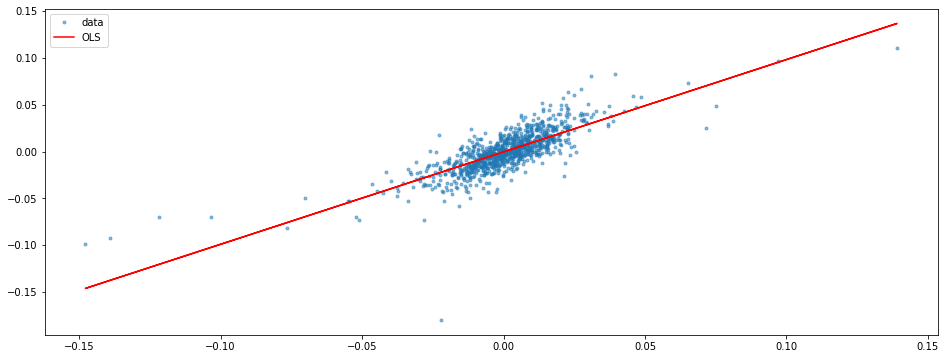

In [74]:
fig, ax = plt.subplots()
ax.plot(ret['IBOVESPA'], ret['ITUB4'], 'o', label='data', alpha=0.5, ms=3)
pred_ols = results.get_prediction()
ax.plot(ret['IBOVESPA'], results.fittedvalues, "r-", label="OLS")
ax.legend(loc="best");

# Diagnósticos da Regressão

- Teste de Normalidade dos Resíduos

In [75]:
import statsmodels.stats.api as sms

name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(results.resid)
list(zip(name, test))

[('Jarque-Bera', 12974.473361688637),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', -1.3237904205716118),
 ('Kurtosis', 20.75774422484927)]

# Regressão com Variáveis Dummy

![](images/examples_notebooks_generated_ols_26_0.png)

<https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html>

# Diversos outros para Regressão

## Estimação

- Mínimos Quadrados Ponderados
- Técnicas de Estimação Robusta
- Mínimos Quadrados Generalizados
- Estimação em Janela Móvel

## Modelos

- Regressão Quantílica
- Modelos de Espaço de Estados
- Modelos de Efeitos Mistos

# Modelos para Séries Temporais

- `statsmodels` tem o Modelo ARIMA com algumas técnicas de estimação diferentes implementadas.

## Modelos ARIMA

- Modelos univariados que tentam explorar as relações implícitas nas variáveis.
    - Avaliam a **Autocorrelação** - correlação linear da variável com ela mesma só que deslocada no tempo.
- São modelos de Séries Temporais para variáveis estacionárias - *tipicamente sem tendência*.

<!-- - **AR**: **Autoregressivo** - o passado explica o futuro
- **I**: **Integrado** - é necessário aplicar diferenças nas variáveis para tornar as variáveis estacionárias
- **MA**: **Média Móvel** - os erros de estimação do passado explicam o futuro -->

In [76]:
from statsmodels.tsa.api import acf, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from statsmodels.graphics.api import qqplot

# Funções de Autocorrelação `acf` e Autocorrelação parcial `pacf`

In [77]:
from statsmodels.tsa.api import acf, pacf

In [78]:
def acf_pacf(x):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=40, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=40, ax=ax2)

# Ruído Branco

In [79]:
rb = np.random.randn(1000)

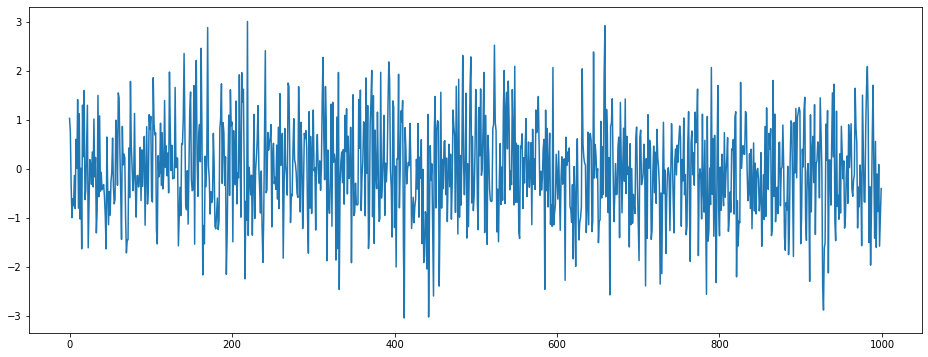

In [80]:
plt.plot(rb);

# Funções `acf` e `pacf` de um Ruído Branco

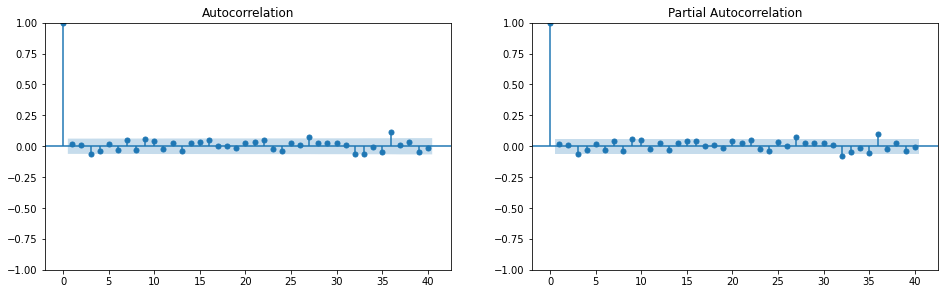

In [81]:
acf_pacf(rb)

# Série Não Estacionária (séries com tendência)

- O somatório acumulado do Ruído Branco é um processo não estacionário

In [82]:
tv = np.cumsum(rb)

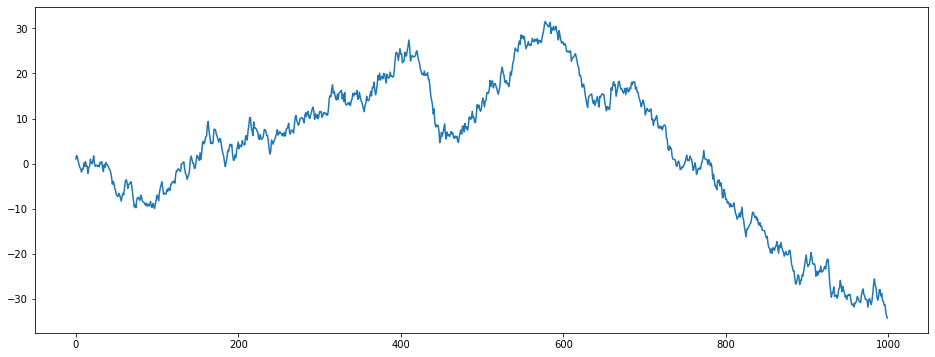

In [83]:
plt.plot(tv);

# Funções `acf` e `pacf` de uma Séries Não Estacionária

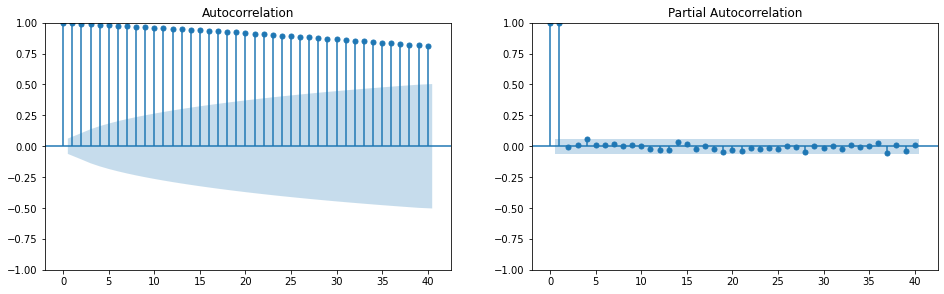

In [84]:
acf_pacf(tv)

# Séries com Sazonalidade

- Séries Temporais de Venda no Varejo costumam apresentar sazonalidade

In [85]:
df = pd.read_csv('data/example_retail_sales.csv')
df['ds'] = pd.PeriodIndex(df['ds'], freq='M')
dfi = df.set_index('ds')

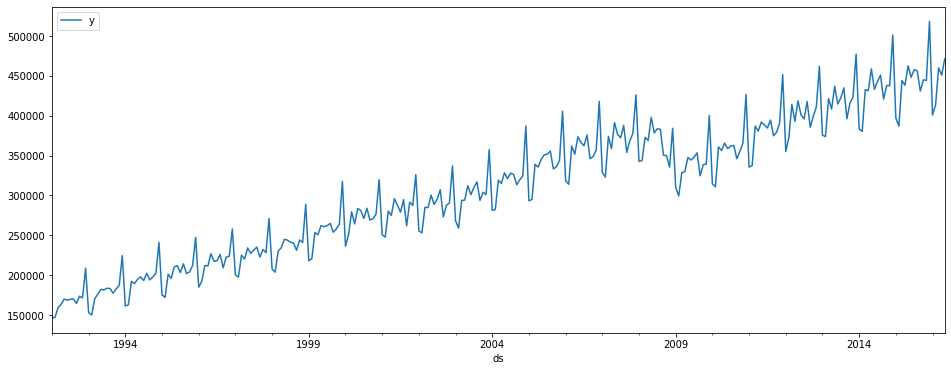

In [86]:
dfi.plot();

- A função de autocorrelação apresenta os efeitos da tendência
- A autocorrelação parcial dá indícios de que temos sazonalidade no ciclo de 12 meses

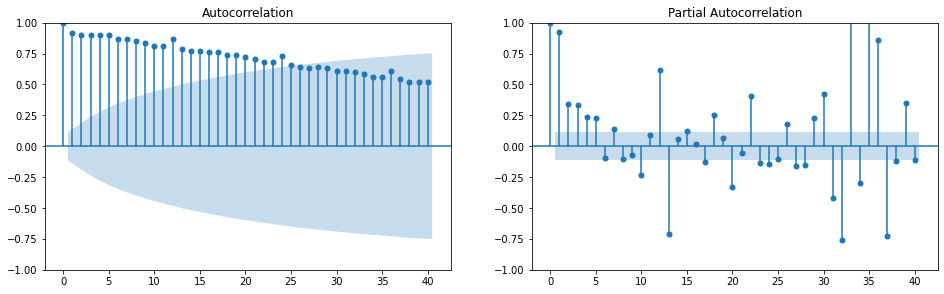

In [87]:
acf_pacf(dfi)

# Tomando diferenças

- Tomando a diferença, elemento a elemento da série, conseguimos remover a tendência.

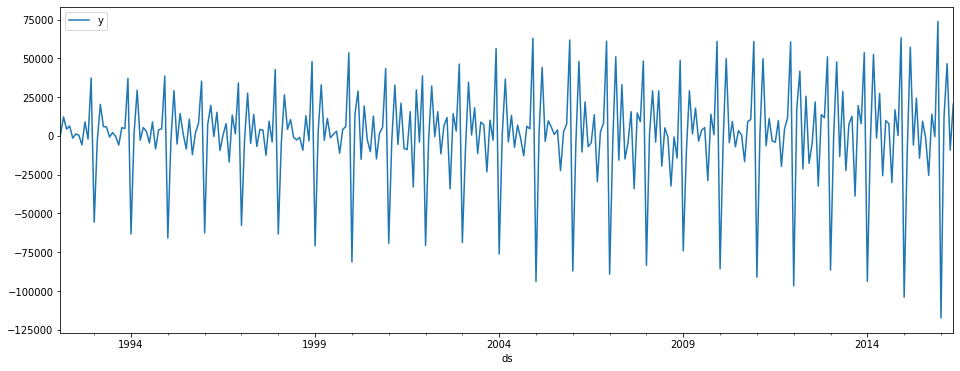

In [88]:
dfi.diff().dropna().plot();

- Na função de autocorrelação os lags de 12, 24, 36 apresentam valores muito significativos confirmando o ciclo de sazonalidade de 12 meses.

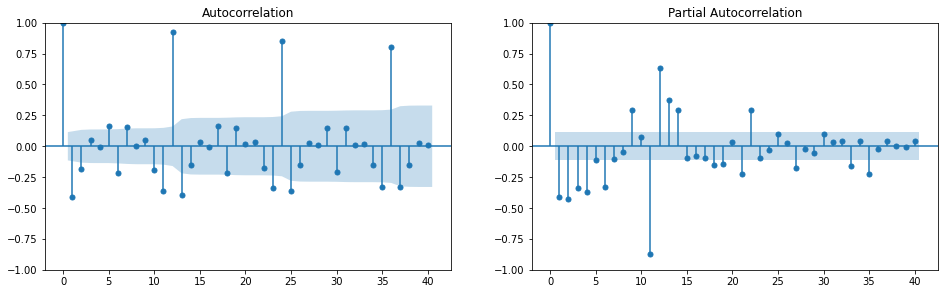

In [89]:
acf_pacf(dfi.diff().dropna())

In [90]:
dfx = dfi.diff().dropna()

train_size = int(dfx.shape[0] * 0.5)
train, test = train_test_split(dfx, train_size=train_size)

# Fit your model
model = pm.auto_arima(train, seasonal=True, m=12)

# make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

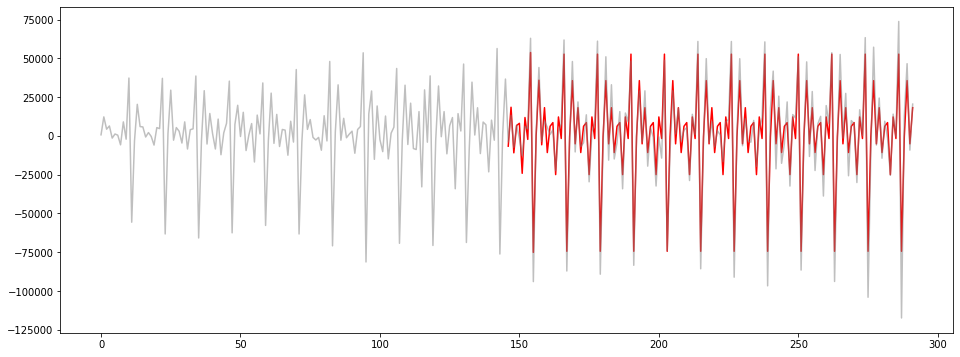

In [91]:
x = np.arange(dfx.shape[0])
plt.plot(x[train_size:], forecasts, 'r-', ms=3)
plt.plot(x, dfx.values, c='grey', alpha=0.5);

# Fazendo previsões com ARIMA

- O pacote `pmdarima` encontra o modelo ARIMA.

- Fortemente inspirado pela função `auto.arima` do R.

In [92]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

- Separa os dados em treino e teste

In [93]:
train_size = int(dfi.shape[0] * 0.5)
train, test = train_test_split(dfi, train_size=train_size)

- Estima o modelo indicando que há sazonalidade e que o ciclo é de 12 meses

In [94]:
model = pm.auto_arima(train, seasonal=True, m=12)

- Faz a previsão no período de teste

In [95]:
forecasts = model.predict(test.shape[0])

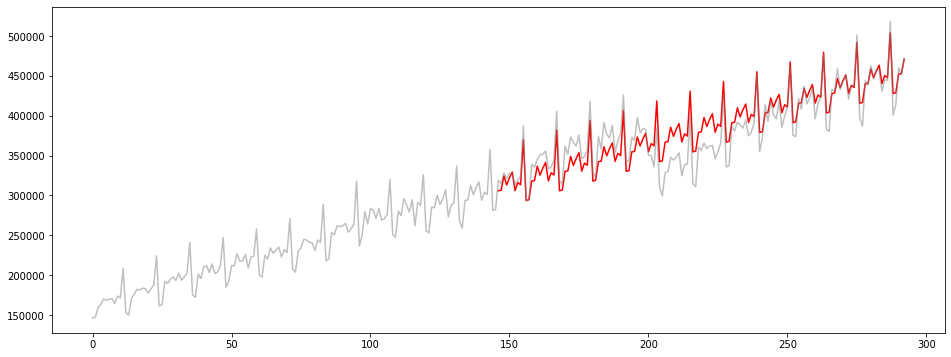

In [96]:
x = np.arange(dfi.shape[0])
plt.plot(x[train_size:], forecasts, 'r-', ms=3)
plt.plot(x, dfi.values, c='grey', alpha=0.5);

In [97]:
print(model.summary())

                                SARIMAX Results                                 
Dep. Variable:                        y   No. Observations:                  146
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood               -1357.883
Date:                  Sun, 12 Dec 2021   AIC                           2719.765
Time:                          09:04:11   BIC                           2725.561
Sample:                               0   HQIC                          2722.121
                                  - 146                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    1.22e+04    526.296     23.182      0.000    1.12e+04    1.32e+04
sigma2       3.71e+07   3.82e+06      9.724      0.000    2.96e+07    4.46e+07
Ljung-Box (L1) (Q):                 

In [98]:
from sklearn.preprocessing import scale
from arch import arch_model

In [99]:
series = yf.download('^BVSP', start='2015-01-01', end='2021-11-30', progress=False)
close = series['Adj Close'].rename('IBOVESPA_CLOSE')
ret = close.pct_change().dropna().rename('IBOVESPA_RETURNS')

In [100]:
am = arch_model(100 * ret)
res = am.fit(disp='off')
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:       IBOVESPA_RETURNS   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3032.20
Distribution:                  Normal   AIC:                           6072.40
Method:            Maximum Likelihood   BIC:                           6094.17
                                        No. Observations:                 1707
Date:                Sun, Dec 12 2021   Df Residuals:                     1706
Time:                        09:04:13   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0862  3.291e-02      2.620  8.790e-03 [2.173e-0

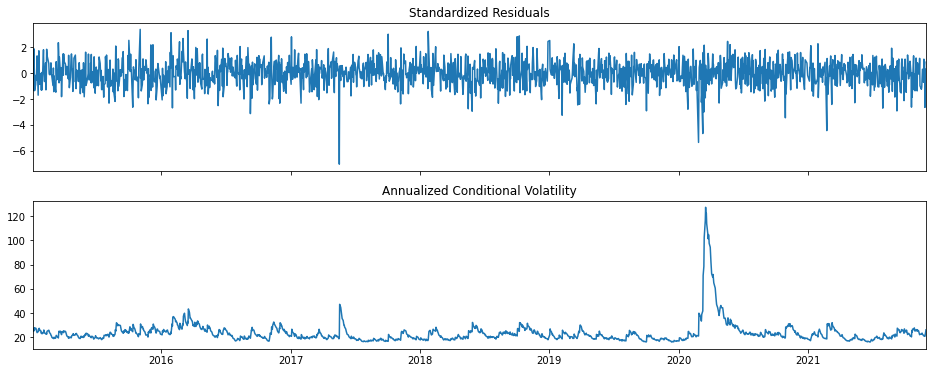

In [101]:
fig = res.plot(annualize="D")

In [102]:
split_date = datetime.datetime(2018,1,1)

res = am.fit(last_obs=split_date, disp='off')

In [103]:
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:       IBOVESPA_RETURNS   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1314.50
Distribution:                  Normal   AIC:                           2637.00
Method:            Maximum Likelihood   BIC:                           2655.43
                                        No. Observations:                  741
Date:                Sun, Dec 12 2021   Df Residuals:                      740
Time:                        09:04:14   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0818  5.440e-02      1.503      0.133 [-2.48

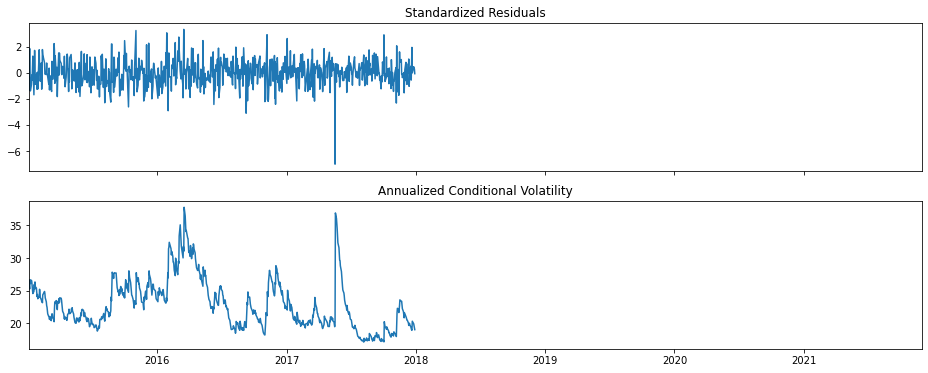

In [104]:
fig = res.plot(annualize="D")

<AxesSubplot:xlabel='Date'>

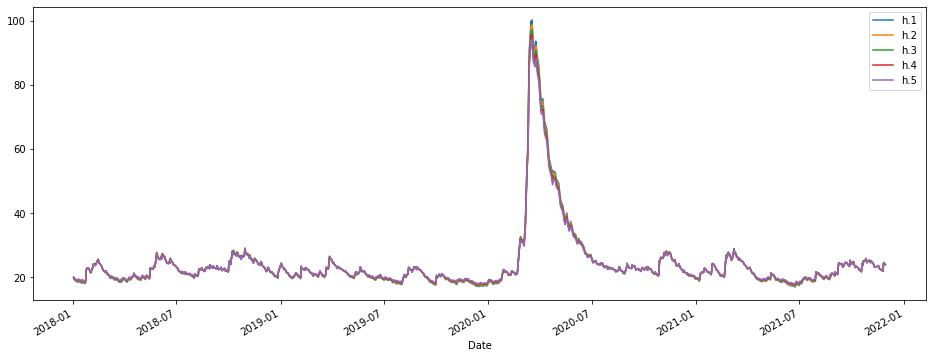

In [105]:
forecasts = res.forecast(horizon=5, start=split_date)
np.sqrt(forecasts.variance[split_date:] * 252).plot()

In [106]:
forecasts = res.forecast(horizon=10, start=split_date, method='simulation')

In [107]:
sim_paths = forecasts.simulations.residual_variances[-1].T

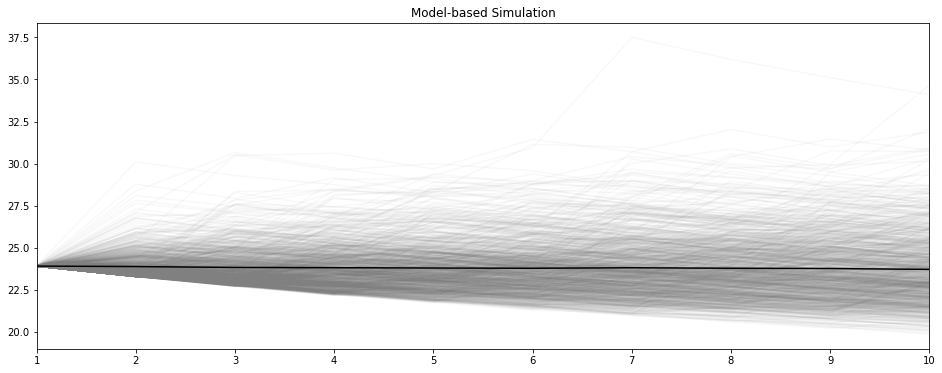

In [108]:
x = np.arange(1, 11)
plt.plot(x, np.sqrt(252 * sim_paths), color='grey', alpha=0.05);
plt.plot(
    x, np.sqrt(252 * forecasts.residual_variance.iloc[-1]), color="k", alpha=1
)
plt.title("Model-based Simulation")
plt.xticks(np.arange(1, 11))
plt.xlim(1, 10)
plt.show()
# plt.ylim(20, 100)

# FIM

- Twitter: `@aboutwilson`
- LinkedIn: <https://www.linkedin.com/in/wilson-freitas/>